In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [3]:
!unzip -qq "/content/drive/MyDrive/Colab_Notebooks/Addinedu/OX.zip"

In [2]:

from numba import cuda

device = cuda.get_current_device(); device.reset()

In [3]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-14 16:12:04.363179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 16:12:05.769897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import os

path = '/home/min/dev_ws/machine_learning/data/O_X_data'
print(len(os.listdir(path)))


600


In [5]:
full_names = os.listdir(path)
full_names

['X.687.jpg',
 'X.545.jpg',
 'X.502.jpg',
 'X.727.jpg',
 'X.521.jpg',
 'X.757.jpg',
 'X.569.jpg',
 'X.784.jpg',
 'X.768.jpg',
 'X.789.jpg',
 'O.102.jpg',
 'O.214.jpg',
 'X.611.jpg',
 'X.554.jpg',
 'X.707.jpg',
 'O.117.jpg',
 'X.560.jpg',
 'O.138.jpg',
 'O.257.jpg',
 'O.241.jpg',
 'X.629.jpg',
 'X.625.jpg',
 'X.513.jpg',
 'O.216.jpg',
 'O.80.jpg',
 'O.199.jpg',
 'O.129.jpg',
 'X.692.jpg',
 'O.49.jpg',
 'X.608.jpg',
 'X.679.jpg',
 'O.114.jpg',
 'X.684.jpg',
 'O.200.jpg',
 'X.628.jpg',
 'O.140.jpg',
 'X.693.jpg',
 'O.31.jpg',
 'O.109.jpg',
 'X.573.jpg',
 'X.720.jpg',
 'X.633.jpg',
 'O.16.jpg',
 'O.292.jpg',
 'O.66.jpg',
 'O.94.jpg',
 'O.52.jpg',
 'X.690.jpg',
 'X.640.jpg',
 'X.637.jpg',
 'O.115.jpg',
 'X.579.jpg',
 'X.713.jpg',
 'O.35.jpg',
 'X.797.jpg',
 'O.160.jpg',
 'O.207.jpg',
 'X.758.jpg',
 'O.151.jpg',
 'O.237.jpg',
 'X.664.jpg',
 'O.10.jpg',
 'O.44.jpg',
 'O.12.jpg',
 'O.229.jpg',
 'O.155.jpg',
 'O.18.jpg',
 'X.594.jpg',
 'X.722.jpg',
 'O.252.jpg',
 'X.576.jpg',
 'O.280.jpg',
 'O.

In [6]:
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

In [7]:
print(labels[:5])
print(file_id[:5])

['X', 'X', 'X', 'X', 'X']
['687', '545', '502', '727', '521']


(568, 626, 3)


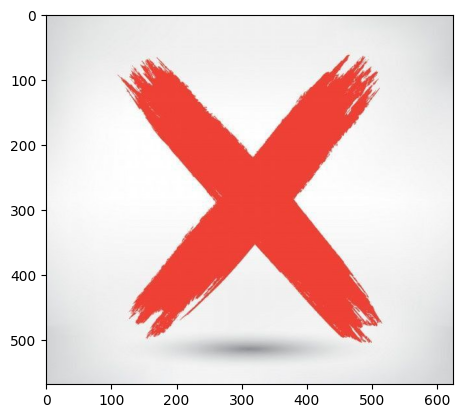

In [8]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample = random.choice(full_names)
#sample

image = mpimg.imread(path + '/' + sample)
print(image.shape)

plt.imshow(image)
plt.show()

In [9]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
from skimage.transform import resize
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
  image = mpimg.imread(path + '/' + file)
  print(image.shape)
  image = resize(image, (128, 128, 3))
  print(image.shape)
  image = rgb2gray(image)
  print(image.shape)
  images.append(image)
  print('-----------------------')
images = np.array(images)

  0%|          | 0/600 [00:00<?, ?it/s]

(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(499, 735, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(225, 225, 4)
(128, 128, 3)
(128, 128)
-----------------------
(1000, 667)
(128, 128, 3)
(128, 128)
-----------------------
(400, 290, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(651, 650, 3)
(128, 128, 3)
(128, 128)
-----------------------
(736, 736, 3)
(128, 128, 3)
(128, 128)
-----------------------
(736, 736, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(3086, 2182, 3)
(128, 128, 3)
(128, 128)
-----------------------
(736, 736, 3)
(128, 128, 3)
(128, 128)
--

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
print(labels[:10])
print(labels_encoded[:10])
print(encoder.classes_)

['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']
[1 1 1 1 1 1 1 1 1 1]
['O' 'X']


In [11]:
path = '/home/min/dev_ws/machine_learning/data/O_X_data'
train_df = pd.DataFrame({'file': os.listdir(path)})

train_df['label'] = labels
train_df['label_encoded'] = labels_encoded

train_df

,file,label,label_encoded
0,X.687.jpg,X,1
1,X.545.jpg,X,1
2,X.502.jpg,X,1
3,X.727.jpg,X,1
4,X.521.jpg,X,1
...,...,...,...
595,O.175.jpg,O,0
596,X.627.jpg,X,1
597,X.683.jpg,X,1
598,X.735.jpg,X,1


In [12]:
from sklearn.model_selection import train_test_split

X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(images, labels_encoded, test_size = 0.2, random_state = 13,
                                                    stratify = labels_encoded)

X_train = np.copy(X_train_og); X_test = np.copy(X_test_og)
y_train = np.copy(y_train_og); y_test = np.copy(y_test_og)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(480, 128, 128) (120, 128, 128)
(480,) (120,)


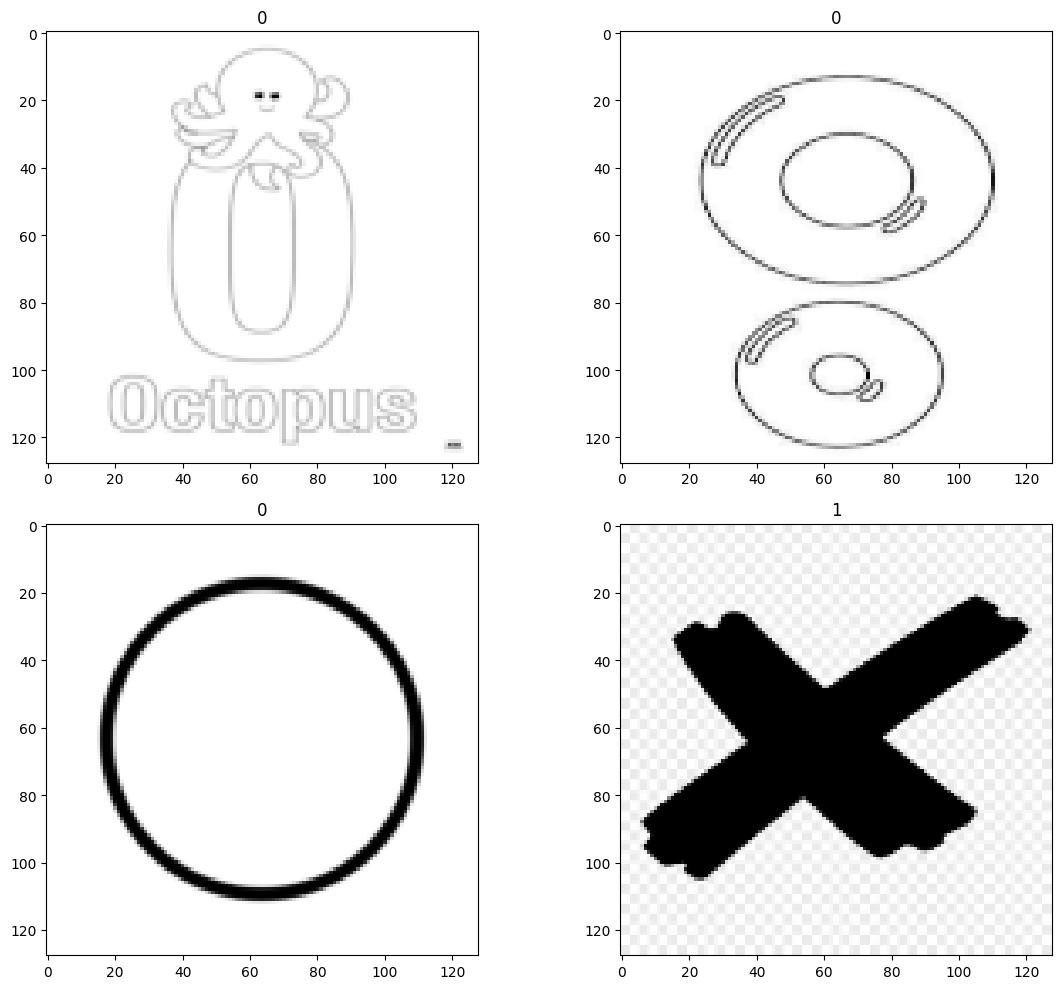

In [13]:
samples = random.choices(population = range(0, 480), k=4)

plt.figure(figsize=(12,10))
for idx, n in enumerate(samples):
  plt.subplot(2, 2, idx+1)
  plt.imshow(X_train[n], cmap = 'gray', interpolation = 'nearest')
  plt.title(y_train[n])

plt.tight_layout()

In [14]:
from tensorflow.keras import layers, models

def get_model(img_size):
  model = models.Sequential([
      layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size, img_size, 1)),
      layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
      layers.Dropout(0.25),

      layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
      layers.MaxPooling2D(pool_size = (2,2)),
      layers.Dropout(0.25),

      layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
      layers.MaxPooling2D(pool_size = (2,2)),
      layers.Dropout(0.25),

      layers.Flatten(),
      layers.Dense(512, activation = 'relu'),
      layers.Dropout(0.25),
      layers.Dense(2, activation = 'softmax')
    ])

  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

In [15]:
model = get_model(128)
model.summary()

/home/min/venv/tensor_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-14 16:20:03.887689: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-14 16:20:03.947791: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/t

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     7,373,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,430,082 (28.34 MB)

 Trainable params: 7,430,082 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
print(X_train.shape, y_train.shape)


(480, 128, 128) (480,)


### 콜백 ReduceLROnPlateau

In [17]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    patience = 2,
    verbose = 1,
    factor = 0.5,
    min_lr = 0.000000001
)

### Early Stopping 콜백 함수

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    verbose = 1,
    mode = 'max',
)

In [19]:
import time
import numpy as np
import tensorflow as tf

# 초기 설정
img_sizes = 128
epochs = 10
best_val_accuracy = -np.inf
best_val_loss = np.inf
best_combination = {}


X_train = resize(X_train, (480, img_sizes, img_sizes, 1))
X_test = resize(X_test, (120, img_sizes, img_sizes, 1))
print(X_train.shape, X_test.shape)
print('***********************************************')

print(f'Training model with img_size={img_sizes}, epochs={epochs}')
start_time = time.time()

# 모델 초기화 및 학습
model = get_model(img_sizes)
hist = model.fit(X_train, y_train, epochs=epochs, verbose=2,
                    validation_data=(X_test, y_test))
print('Fit time: ', time.time() - start_time)
print('---------------------------------------')

# 최대 val_accuracy와 최소 val_loss 갱신
max_val_acc = max(hist.history['val_accuracy'])
min_val_loss = min(hist.history['val_loss'])


(480, 128, 128, 1) (120, 128, 128, 1)
***********************************************
Training model with img_size=128, epochs=10
Epoch 1/10


I0000 00:00:1715671213.849278  147283 service.cc:145] XLA service 0x7deefc003f70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715671213.849317  147283 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-05-14 16:20:13.891009: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-14 16:20:14.096968: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1715671223.594029  147283 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 - 15s - 995ms/step - accuracy: 0.5063 - loss: 1.1277 - val_accuracy: 0.5417 - val_loss: 0.6899
Epoch 2/10
15/15 - 0s - 16ms/step - accuracy: 0.6229 - loss: 0.6764 - val_accuracy: 0.5833 - val_loss: 0.6583
Epoch 3/10
15/15 - 0s - 17ms/step - accuracy: 0.7188 - loss: 0.5406 - val_accuracy: 0.8250 - val_loss: 0.5258
Epoch 4/10
15/15 - 0s - 16ms/step - accuracy: 0.9104 - loss: 0.2762 - val_accuracy: 0.8583 - val_loss: 0.3256
Epoch 5/10
15/15 - 0s - 16ms/step - accuracy: 0.9542 - loss: 0.1585 - val_accuracy: 0.9083 - val_loss: 0.2105
Epoch 6/10
15/15 - 0s - 16ms/step - accuracy: 0.9646 - loss: 0.0923 - val_accuracy: 0.9250 - val_loss: 0.1986
Epoch 7/10
15/15 - 0s - 16ms/step - accuracy: 0.9792 - loss: 0.0493 - val_accuracy: 0.9500 - val_loss: 0.1480
Epoch 8/10
15/15 - 0s - 16ms/step - accuracy: 0.9812 - loss: 0.0466 - val_accuracy: 0.9583 - val_loss: 0.1514
Epoch 9/10
15/15 - 0s - 16ms/step - accuracy: 0.9937 - loss: 0.0372 - val_accuracy: 0.9500 - val_loss: 0.1662
Epoch 10/10
15/15 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
이미지에 대한 예측된 라벨: O


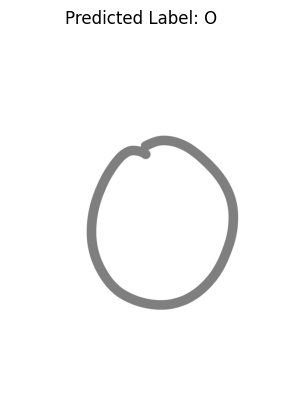

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (128, 128))
    preprocessed_image = resized_image.astype('float32') / 255.0
    input_image = np.expand_dims(preprocessed_image, axis=-1)
    return input_image

def predict_image(image_path, model):
    preprocessed_image = preprocess_image(image_path)
    input_image = np.expand_dims(preprocessed_image, axis=0)
    predictions = model.predict(input_image)
    predicted_class = np.argmax(predictions)
    return predicted_class


image_path = '/home/min/dev_ws/machine_learning/data/0_X_Test/Test-22.jpg'

predicted_class = predict_image(image_path, model)

class_mapping = {0: 'O', 1: 'X'}

predicted_label = class_mapping[predicted_class]

print("이미지에 대한 예측된 라벨:", predicted_label)

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(image)
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off') 
plt.show()

In [21]:
predicted_labels = []

# 파일 경로 리스트를 생성
image_folder = '/home/min/dev_ws/machine_learning/data/0_X_Test'
image_files = os.listdir(image_folder)

# 각 이미지에 대한 예측 수행
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    predicted_class = predict_image(image_path, model)
    predicted_label = class_mapping[predicted_class]
    predicted_labels.append(predicted_label)

# 예측된 라벨 출력
print("예측된 라벨들:", predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [22]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

def label_from_folder_number(folder_number):
    return 0 if folder_number <= 50 else 1

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (128, 128))
    preprocessed_image = resized_image.astype('float32') / 255.0
    input_image = np.expand_dims(preprocessed_image, axis=-1)
    return input_image

def predict_images_in_folder(folder_path, model):
    predictions = []
    true_labels = []
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        predicted_class = predict_image(image_path, model)
        predictions.append(predicted_class)
        
        # 폴더 넘버 추출
        folder_number = int(file_name.split('-')[1].split('.')[0])
        true_label = label_from_folder_number(folder_number)
        true_labels.append(true_label)
        
    return predictions, true_labels

folder_path = '/home/min/dev_ws/machine_learning/data/0_X_Test'
predicted_labels, true_labels = predict_images_in_folder(folder_path, model)

# 예측값과 실제값 출력
print("예측값:", predicted_labels)
print("실제값:", true_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

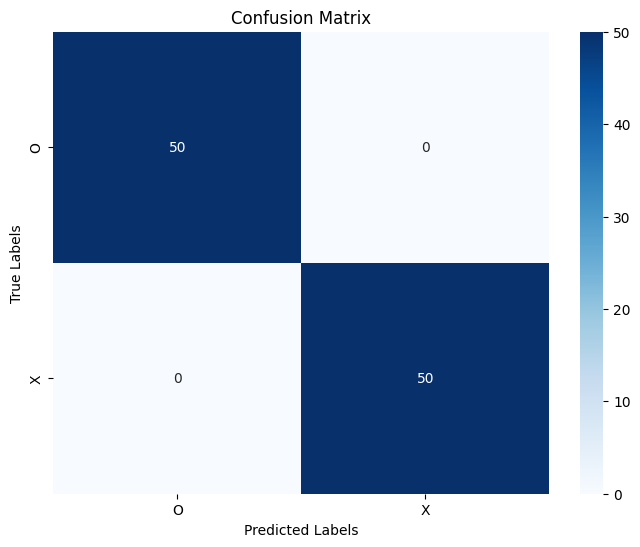

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix 계산
cm = confusion_matrix(true_labels, predicted_labels)

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['O', 'X'], yticklabels=['O', 'X'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


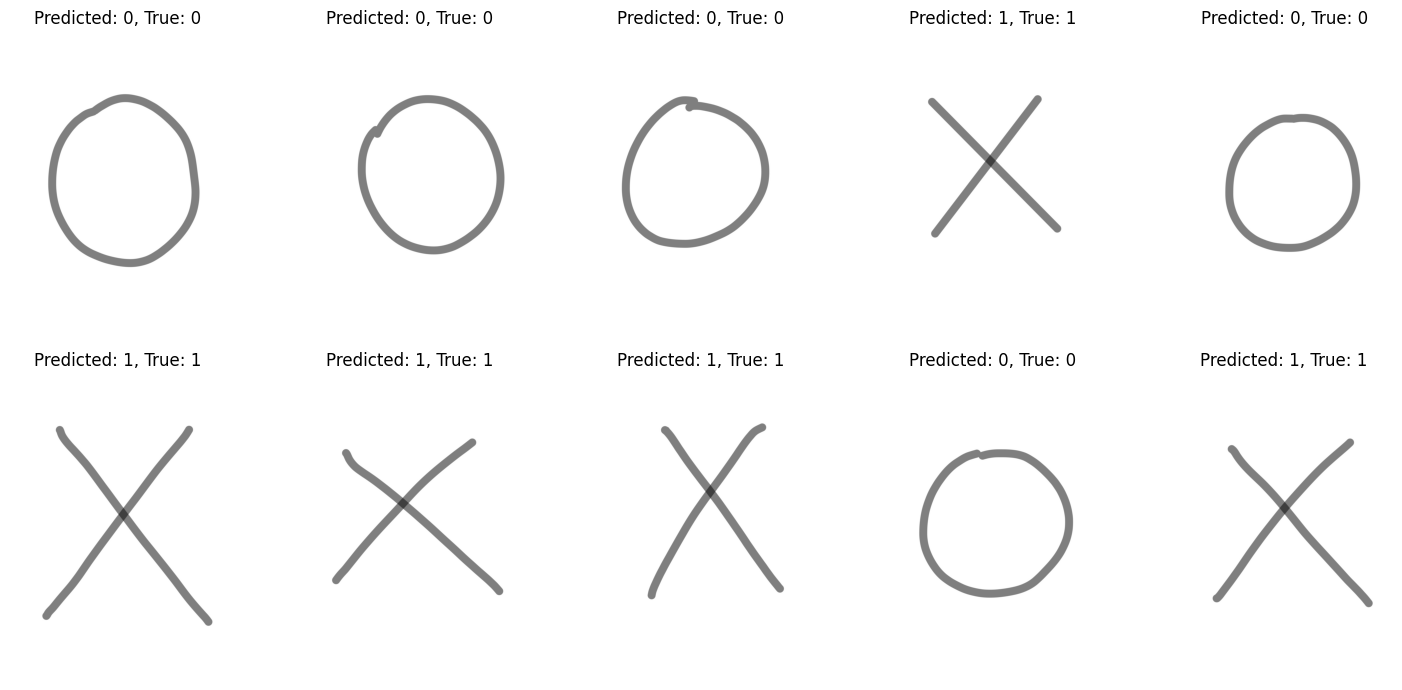

In [24]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지 전처리 함수
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (128, 128))
    preprocessed_image = resized_image.astype('float32') / 255.0
    input_image = np.expand_dims(preprocessed_image, axis=-1)
    return input_image

# 이미지 예측 함수
def predict_image(image_path, model):
    preprocessed_image = preprocess_image(image_path)
    input_image = np.expand_dims(preprocessed_image, axis=0)
    predictions = model.predict(input_image)
    predicted_class = np.argmax(predictions)
    return predicted_class

# 이미지 폴더 경로 설정
folder_path = '/home/min/dev_ws/machine_learning/data/0_X_Test'

# 이미지 파일 리스트
image_files = os.listdir(folder_path)

# 무작위로 10개의 이미지 선택
random_image_files = random.sample(image_files, 10)

# 서브플롯으로 이미지 출력
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for i, file_name in enumerate(random_image_files):
    image_path = os.path.join(folder_path, file_name)
    predicted_class = predict_image(image_path, model)
    true_label = label_from_folder_number(int(file_name.split('-')[1].split('.')[0]))
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 서브플롯에 이미지 출력
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title(f"Predicted: {predicted_class}, True: {true_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

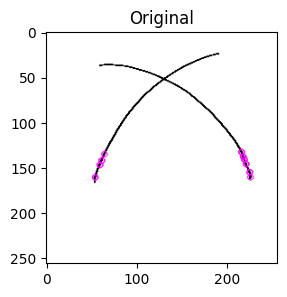

In [34]:

# 0 ~ 255 범위로 정규화 및 데이터 타입 변환
# 이미지 폴더 경로 설정
folder_path = '/home/min/dev_ws/machine_learning/data/O_X_data/X.563.jpg'
image = cv2.imread(folder_path)
image = cv2.resize(image ,(256,256))
import cv2
import matplotlib.pyplot as plt



# 0 ~ 255 범위로 정규화 및 데이터 타입 변환
original_image = np.copy(image)
original_image_unit8 = cv2.normalize(original_image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# SIFT 디스크립터 생성
sift = cv2.SIFT_create()

original_keypoints_sift, original_descriptors_sift = sift.detectAndCompute(original_image_unit8, None)

plt.figure(figsize=(4, 3))
original_keypoints_image = cv2.drawKeypoints(original_image_unit8, original_keypoints_sift, None, (255, 0, 255))

plt.title('Original')
plt.imshow(original_keypoints_image)

In [28]:
len(original_keypoints_sift)

13

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


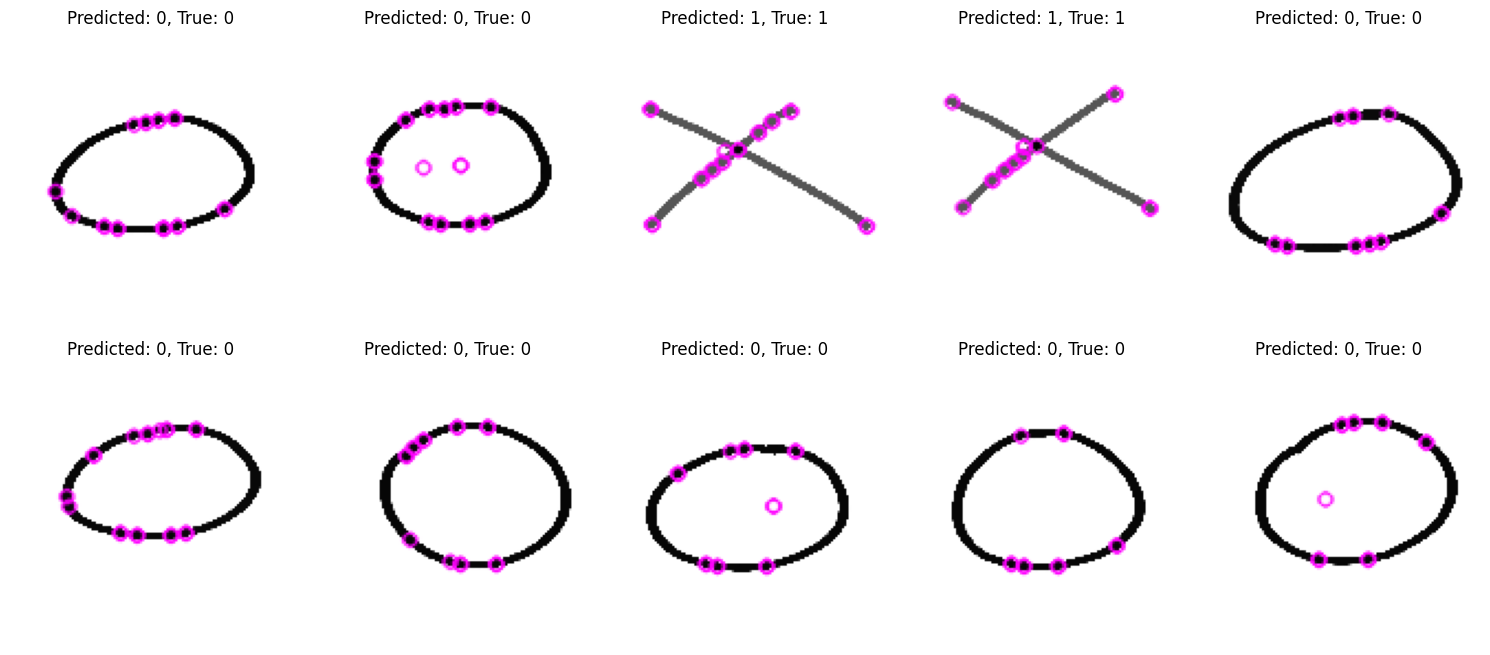

In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 이미지 전처리 함수
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, (128, 128))
    preprocessed_image = resized_image.astype('float32') / 255.0
    input_image = np.expand_dims(preprocessed_image, axis=-1)
    return input_image

# 이미지 예측 함수
def predict_image(image_path, model):
    preprocessed_image = preprocess_image(image_path)
    input_image = np.expand_dims(preprocessed_image, axis=0)
    predictions = model.predict(input_image)
    predicted_class = np.argmax(predictions)
    return predicted_class

# 이미지 폴더 경로 설정
folder_path = '/home/min/dev_ws/machine_learning/data/0_X_Test'

# 이미지 파일 리스트
image_files = os.listdir(folder_path)

# 무작위로 10개의 이미지 선택
random_image_files = random.sample(image_files, 10)

# 서브플롯으로 이미지 출력
fig, axes = plt.subplots(2, 5, figsize=(15, 7))
for i, file_name in enumerate(random_image_files):
    image_path = os.path.join(folder_path, file_name)
    predicted_class = predict_image(image_path, model)
    true_label = label_from_folder_number(int(file_name.split('-')[1].split('.')[0]))
    
    # 이미지 불러오기
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image ,(128,128))
    
    original_image = np.copy(image)
    original_image_unit8 = cv2.normalize(original_image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    # SIFT 디스크립터 생성
    sift = cv2.SIFT_create()

    original_keypoints_sift, original_descriptors_sift = sift.detectAndCompute(original_image_unit8, None)

    original_keypoints_image = cv2.drawKeypoints(original_image_unit8, original_keypoints_sift, None, (255, 0, 255))
    
    # 서브플롯에 이미지 출력
    ax = axes[i // 5, i % 5]
    ax.imshow(original_keypoints_image)
    ax.set_title(f"Predicted: {predicted_class}, True: {true_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()